<a href="https://colab.research.google.com/github/JavariaAmber/python-project/blob/main/Copy_of_Decisiontreeassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Read CSV file stored in Google Drive
from google.colab import drive # Import 'drive' module from the 'google.colab' library
drive.mount('/content/drive') # This mounts your Google Drive into the Colab virtual environment.

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/drug.csv.csv'
df = pd.read_csv(file_path)

print(df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


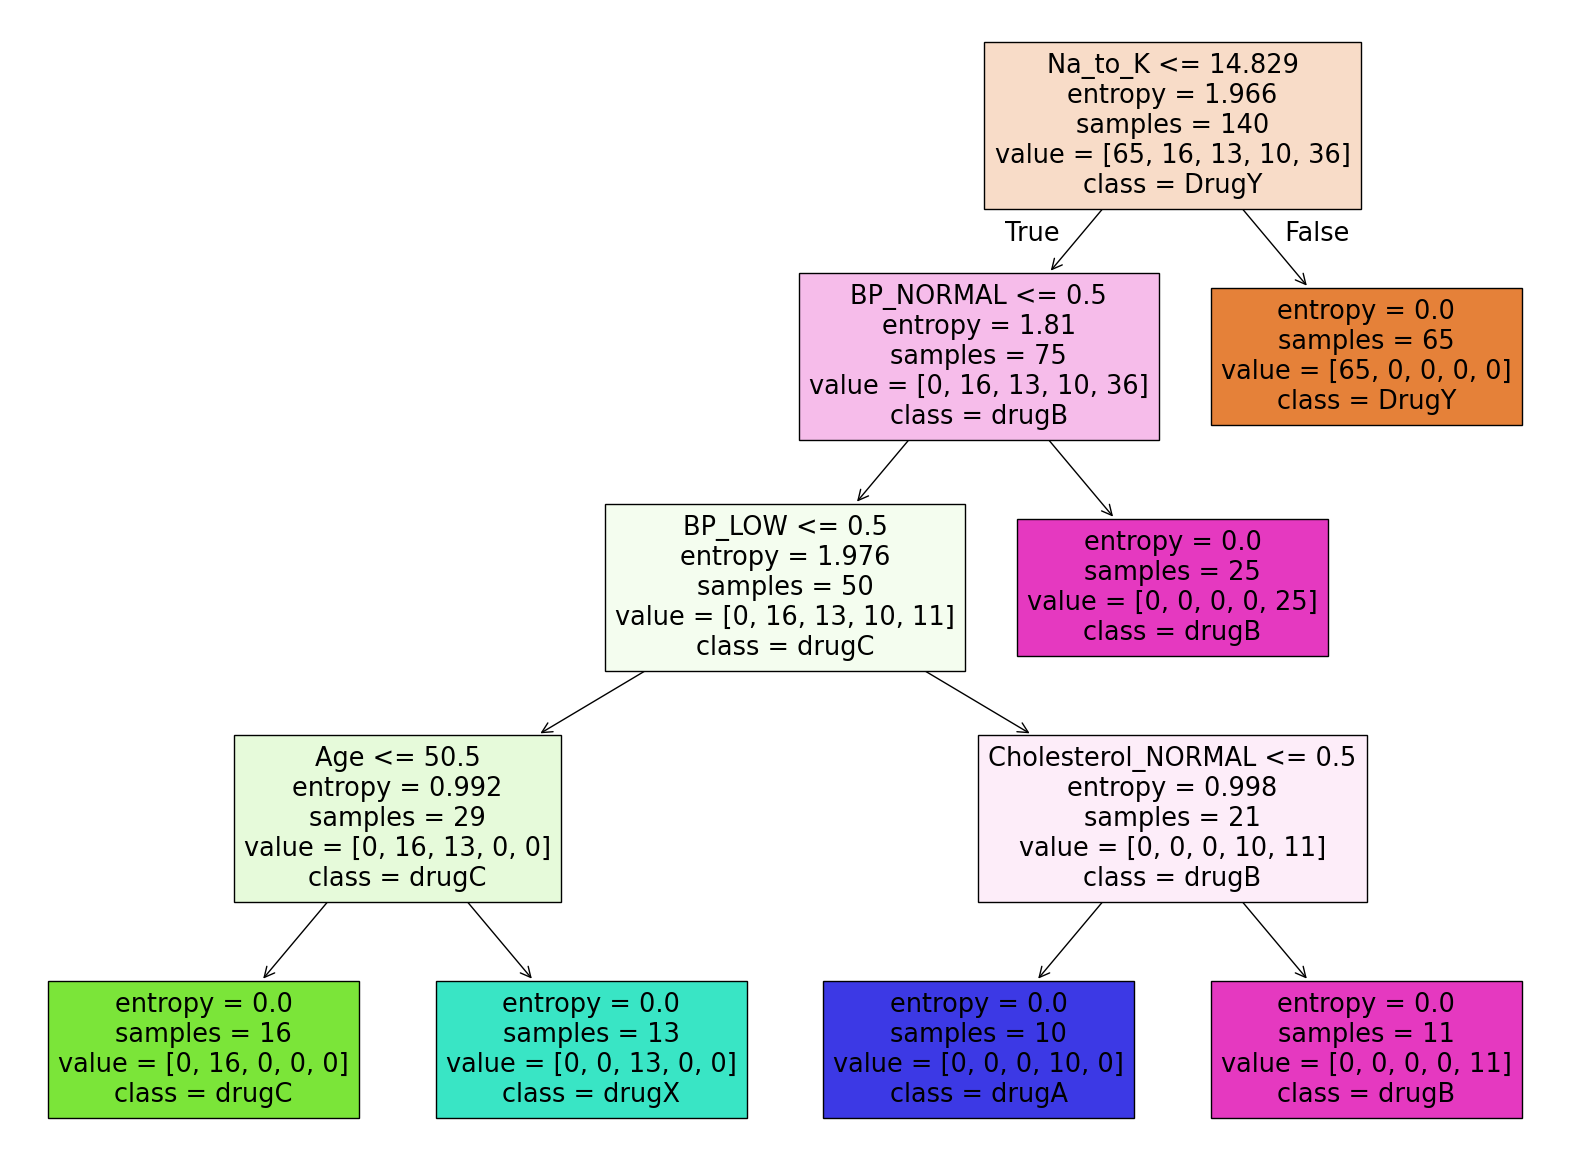

Confusion Matrix:
[[26  0  0  0  0]
 [ 0  7  0  0  0]
 [ 0  0  3  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 18]]

Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60


Accuracy Score:
1.0


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

# Use the existing DataFrame 'df' loaded from the CSV
# Assuming 'Drug' is the target variable and the rest are features
X = df.drop('Drug', axis=1)
y = df['Drug']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
# by default use 'gini'
#clf = DecisionTreeClassifier(random_state=42)
clf = DecisionTreeClassifier(criterion='entropy',max_depth=4)

# Train the model
clf.fit(X_train, y_train)

# Visualize the tree (optional - might be large)
plt.figure(figsize=(20,15))
plot_tree(clf, feature_names=X.columns.tolist(), class_names=y.unique().tolist(), filled=True)
plt.show()

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
# Use sorted unique values of y as target_names for classification_report
print(classification_report(y_test, y_pred, target_names=sorted(y.unique().tolist())))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))